# Chapter 3

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from itertools import cycle

sns.set(style='ticks')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [41]:
df = pd.read_csv('teaching_method.csv')
df

,ID,Name,Sex,Math,Statistics,Psychology_test,Statistics_test1,Statistics_test2,Method
0,1,大村,m,dislike,like,13,6,10,C
1,2,本多,m,dislike,like,14,10,13,B
2,3,川崎,m,like,like,7,6,8,B
3,4,多村,m,like,like,12,10,15,A
4,5,松中,m,dislike,dislike,10,5,8,B
5,6,小久保,m,dislike,dislike,6,3,6,C
6,7,柴原,m,dislike,dislike,8,5,9,A
7,8,井手,m,dislike,dislike,15,9,10,D
8,9,田上,m,dislike,dislike,4,3,7,D
9,10,松田,m,like,dislike,14,3,3,D


In [42]:
test1 = df['Statistics_test1'].values
test2 = df['Statistics_test2'].values

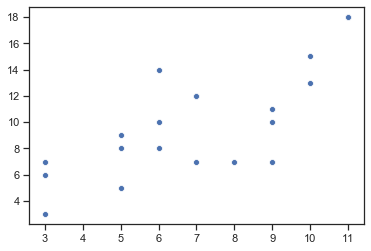

In [43]:
sns.scatterplot(test1, test2)
plt.show()

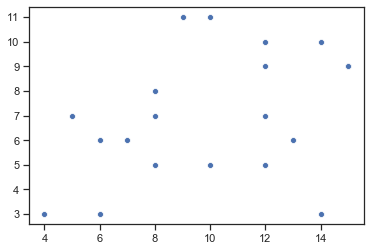

In [44]:
psy_test = df['Psychology_test'].values
sns.scatterplot(psy_test, test1)
plt.show()

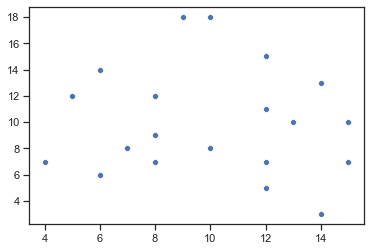

In [45]:
sns.scatterplot(psy_test, test2)
plt.show()

In [46]:
cov = np.sum( (test1-np.mean(test1))*(test2-np.mean(test2)) ) / len(test1)
print(cov)

7.55


In [47]:
cov_matrix = np.cov([test1, test2])
print(cov_matrix)
cov = cov_matrix[0][1]
print(cov)

[[ 6.63157895  7.94736842]
 [ 7.94736842 16.94736842]]
7.947368421052631


In [48]:
cov_matrix = np.cov([test1, test2], bias=True)
print(cov_matrix)
cov = cov_matrix[0][1]
print(cov)

[[ 6.3   7.55]
 [ 7.55 16.1 ]]
7.550000000000001


In [49]:
height_m = np.array([1.5, 1.6, 1.7, 1.8, 1.9])
height_cm = height_m*100
weight = (50, 70, 60, 80, 90)

In [50]:
print(np.cov([height_m, weight])[0][1])
print(np.cov([height_cm, weight])[0][1])

2.25
225.0


In [51]:
print(cov/(np.std(test1)*np.std(test2)))

0.7496589648242449


In [52]:
print(np.corrcoef(test1, test2)[0][1])

0.7496589648242451


In [53]:
print(np.corrcoef(psy_test, test1)[0][1])
print(np.corrcoef(psy_test, test2)[0][1])

0.3826645351115601
-0.09350516170219907


In [54]:
math = df['Math'].values
statistics = df['Statistics'].values

In [56]:
print(df['Math'].value_counts())
print(df['Statistics'].value_counts())

dislike    14
like        6
Name: Math, dtype: int64
dislike    12
like        8
Name: Statistics, dtype: int64


In [57]:
pd.crosstab(index=[df['Math']],columns=df['Statistics']) 

Statistics,dislike,like
Math,,
dislike,10,4
like,2,4


In [58]:
math=='like'

array([False, False,  True,  True, False, False, False, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False])

In [60]:
math_dummy = (math=='like').astype(np.int)
print(math_dummy)
statistics_dummy = (statistics=='like').astype(np.int)
print(statistics_dummy)

[0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0]


In [63]:
np.corrcoef(math_dummy, statistics_dummy)[0][1]

0.35634832254989923

# Practice

In [66]:
# 1
df = pd.DataFrame([[1,3,10,12,6,3,8,4,1,5],
                   [20,40,100,80,50,50,70,50,10,60]],
             index=['time', 'point']).T
df

,time,point
0,1,20
1,3,40
2,10,100
3,12,80
4,6,50
5,3,50
6,8,70
7,4,50
8,1,10
9,5,60


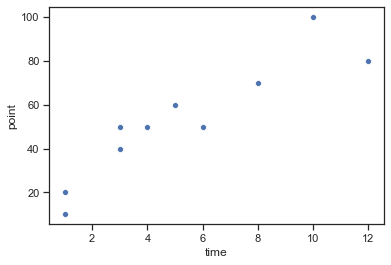

In [69]:
sns.scatterplot(df['time'], df['point'])
plt.show()

In [70]:
# 2
np.corrcoef(df['time'], df['point'])[0][1]

0.9092973987719787